In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
import warnings
warnings.simplefilter("ignore")

In [118]:
data = pd.read_csv('BankChurners.csv')

In [119]:
data = data.replace('Existing Customer', 1)
data = data.replace('Attrited Customer', 0)
data = data.replace('M', 1)
data = data.replace('F', 0)
data.loc[data['Education_Level'] == 'College',       'Education_Level'] = 6
data.loc[data['Education_Level'] == 'Doctorate',     'Education_Level'] = 10
data.loc[data['Education_Level'] == 'Graduate',      'Education_Level'] = 8
data.loc[data['Education_Level'] == 'High School',   'Education_Level'] = 4
data.loc[data['Education_Level'] == 'Post-Graduate', 'Education_Level'] = 12
data.loc[data['Education_Level'] == 'Uneducated',    'Education_Level'] = 2
data.loc[data['Education_Level'] == 'Unknown',       'Education_Level'] =data['Education_Level'].mode()[0]
data['Education_Level'] = data['Education_Level'].astype(int)
data = data.replace('Blue', 1)
data = data.replace('Silver', 2)
data = data.replace('Gold', 3)
data = data.replace('Platinum', 4)
data = data.replace('Less than $40K', 20)
data = data.replace('$40K - $60K', 50)
data = data.replace('$60K - $80K', 70)
data = data.replace('$80K - $120K', 100)
data = data.replace('$120K +', 150)
data.loc[data['Income_Category'] == 'Unknown', 'Income_Category'] = data['Income_Category'].mode()[0]
data['Income_Category'] = data['Income_Category'].astype(int)
data = pd.get_dummies(data, columns=['Marital_Status'], drop_first = True)
data.corr()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
CLIENTNUM,1.000000,0.046430,0.007613,0.020188,0.006772,0.003350,0.024364,0.002086,0.134588,0.006907,...,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410,-0.003128,-0.009557,0.010771
Attrition_Flag,0.046430,1.000000,-0.018203,0.037272,-0.018991,-0.017851,0.010114,-0.002354,-0.013687,0.150005,...,0.131063,0.168598,0.371403,0.290054,0.178410,-0.999989,0.999989,0.023735,-0.019037,-0.008904
Customer_Age,0.007613,-0.018203,1.000000,-0.017312,-0.122254,-0.004722,0.029821,-0.018235,0.788912,-0.010931,...,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189,0.047364,-0.011248,-0.026694
Gender,0.020188,0.037272,-0.017312,1.000000,0.004563,-0.007097,0.753042,0.080093,-0.006728,0.003157,...,0.026712,0.024890,-0.067454,-0.005800,-0.257851,-0.037204,0.037204,0.011427,-0.015756,0.012307
Dependent_count,0.006772,-0.018991,-0.122254,0.004563,1.000000,0.007823,0.064564,0.030469,-0.103062,-0.039076,...,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189,0.014385,-0.040707,0.041743
Education_Level,0.003350,-0.017851,-0.004722,-0.007097,0.007823,1.000000,-0.009721,0.016916,-0.001887,0.000115,...,-0.005868,-0.004003,-0.005799,-0.019003,0.002685,0.017990,-0.017991,0.009997,-0.003964,-0.000572
Income_Category,0.024364,0.010114,0.029821,0.753042,0.064564,-0.009721,1.000000,0.082334,0.025947,-0.004463,...,0.010873,0.018352,-0.051223,-0.015581,-0.278311,-0.010058,0.010058,0.022490,-0.023852,0.007861
Card_Category,0.002086,-0.002354,-0.018235,0.080093,0.030469,0.016916,0.082334,1.000000,-0.012535,-0.094077,...,0.007385,0.196003,0.134275,-0.007261,-0.198711,0.002365,-0.002365,-0.049254,0.040783,0.021881
Months_on_book,0.134588,-0.013687,0.788912,-0.006728,-0.103062,-0.001887,0.025947,-0.012535,1.000000,-0.009203,...,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694,0.033194,-0.005065,-0.026145
Total_Relationship_Count,0.006907,0.150005,-0.010931,0.003157,-0.039076,0.000115,-0.004463,-0.094077,-0.009203,1.000000,...,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981,0.017001,-0.017329,-0.009376


In [120]:
A = 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
B = 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
C = 'CLIENTNUM'
D='Marital_Status_Unknown'
E='Card_Category'
F='Avg_Open_To_Buy' 
G='Credit_Limit'
H='Customer_Age'
I='Gender'
J='Marital_Status_Single'
data = data.drop([A, B, C,J,D,E,F], axis=1)

In [121]:
data.sample(10)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married
4516,1,46,1,5,2,100,28,6,1,1,34516.0,1259,0.671,4300,94,0.741,0.036,0
3272,0,54,0,3,10,20,36,3,3,4,1438.3,0,0.499,1598,40,0.290,0.000,0
2798,1,49,0,2,12,20,36,3,1,3,3414.0,1473,0.597,1803,49,1.130,0.431,0
10091,1,52,1,1,4,100,41,4,1,4,4103.0,1972,0.665,16344,118,0.788,0.481,0
7484,0,56,0,3,6,20,46,1,3,3,2272.0,1350,0.762,2354,49,0.960,0.594,0
10096,1,56,1,2,6,100,46,3,3,5,12540.0,1696,0.799,16518,115,0.716,0.135,0
1026,1,54,1,3,8,150,46,3,1,3,34516.0,854,0.928,1999,54,0.800,0.025,1
8575,1,48,1,4,8,100,33,1,3,2,4963.0,2115,0.767,4989,78,0.696,0.426,1
4474,0,45,0,2,8,20,25,3,2,3,5911.0,916,0.471,1656,31,0.722,0.155,1
9840,1,38,1,0,4,70,31,4,3,3,16565.0,1200,0.680,16736,99,0.800,0.072,1


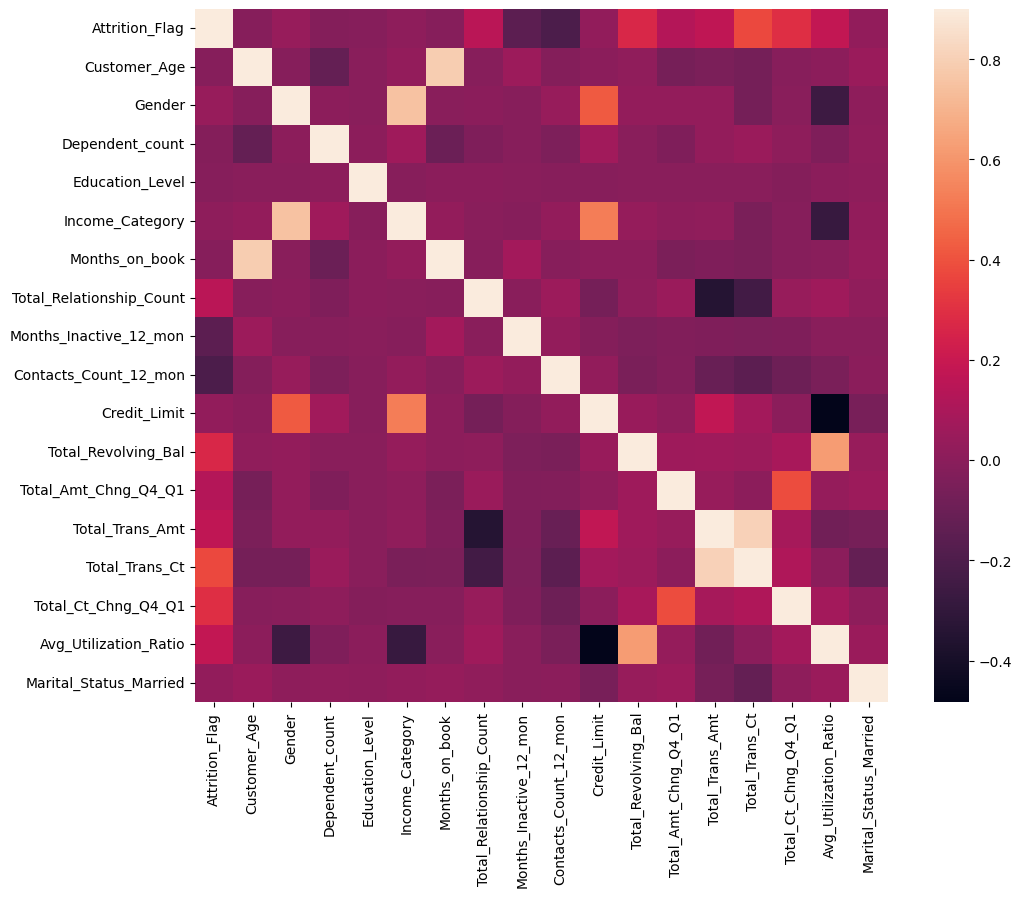

In [122]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [123]:
class MyLogisticRegression:
    def __init__(self, random_state=42):
        self.random_state = random_state
    
    def sigmoid(self, x):
        '''
        Sigmoid activation function
        '''
        # relu = nn.ReLU()
        # tensor = torch.tensor(x)
        return 1 / (1 + np.exp(-x))
        #return relu(tensor)
        # alpha =0.01
        # return np.maximum(alpha*x,x)
    
    def ce_loss(self, y_pred, y_true):
        '''
        Cross Entropy Loss used for Logistic Regression
        '''
        y_pred = y_pred.reshape(-1, 1)
        y_true = y_true.reshape(-1, 1)
        # eps = 1e-7

        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X_train, y_train, lr, n_iters):
        '''
        Performs gradient descent to learn the parameters of the model
        '''
        self.n_inters = n_iters
        m, self.INPUT_DIM = X_train.shape
        np.random.seed(self.random_state)
        self.W = np.random.randn(self.INPUT_DIM, 1)
        self.b = 0
        
        y_train = y_train.reshape(-1, 1)
        self.loss_history = []

        for epoch in range(n_iters):
            z = np.dot(X_train, self.W) + self.b
            y_hat = self.sigmoid(z)
            
            loss = self.ce_loss(y_hat, y_train)
            self.loss_history.append(loss)
            
            y_pred = (y_hat > 0.5).astype(int)
            accuracy = np.mean(y_pred == y_train)
            
            dW = np.dot(X_train.T, (y_hat - y_train)) / m
            db = np.mean(y_hat - y_train)
            
            self.W -= lr * dW
            self.b -= lr * db
            
    
    def predict(self, X, dec_thresh=0.5):
        '''
        Returns predictions for the given data
        '''
        z = np.dot(X, self.W) + self.b
        y_hat = self.sigmoid(z)
        return (y_hat > dec_thresh).astype(int)

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.show()


In [124]:
y = data['Attrition_Flag']
X = data.drop(columns='Attrition_Flag')
y.shape

(10127,)

In [125]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=69)
X_s, y_s = oversample.fit_resample(X, y)
X_s = X_s.to_numpy()
y_s = y_s.to_numpy()
print("the percent of 1s in the label after using SMOTE: {} %".format(y_s.mean()*100))

the percent of 1s in the label after using SMOTE: 50.0 %


In [126]:
for col in range(X.shape[1]):
    min = X_s[:, col].min()
    max = X_s[:, col].max()
    X_s[:, col] = (X_s[:, col] - min) / (max - min)

In [127]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (X_s, y_s, train_size=0.55, random_state=69)
print("The training data size : {} ".format(x_train.shape))
print("The test data size : {} ".format(x_test.shape))


The training data size : (9350, 17) 
The test data size : (7650, 17) 


out time:  14.016651630401611
Accuracy: 0.84


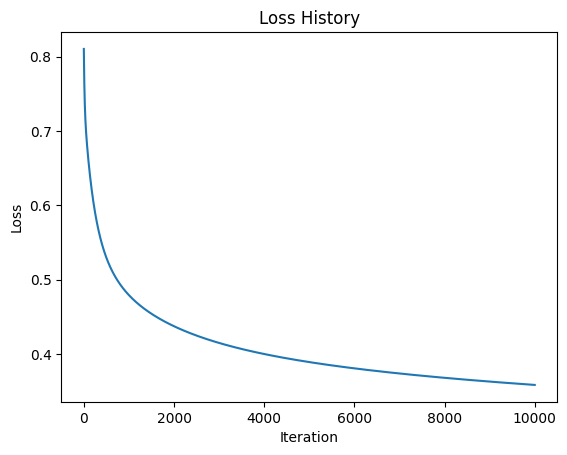

In [128]:
from sklearn.metrics import accuracy_score

# Create an instance of the MyLogisticRegression class
starting_time = time.time()
my_logreg = MyLogisticRegression(random_state=40)
# Fit the model to the training data
n_iters = 10000
my_logreg.fit(x_train, y_train,  lr=0.05, n_iters=10000)
ending_time = time.time()
# Make predictions on the test data
y_pred = my_logreg.predict(x_test)


time4our = ending_time - starting_time
print("out time: " , time4our)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
# print(my_logreg.loss_history)
my_logreg.plot_loss_history()

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
# model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# model.fit(x_train,y_train)

# X_test = sm.add_constant(x_test) # Add a constant term for the intercept
# y_pred1 = my_logreg.predict(x_test)

# print("Accuracy:", accuracy_score(y_test, y_pred1))
# print("Precision:", precision_score(y_test, y_pred1))
# print("Recall:", recall_score(y_test, y_pred1))
# print("F1 score:", f1_score(y_test, y_pred1))

In [130]:
y_pred2 = my_logreg.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
acc1 = accuracy_score(y_test, y_pred2)
print("Precision:", precision_score(y_test, y_pred2))
prec1 = precision_score(y_test, y_pred2)
print("Recall:", recall_score(y_test, y_pred2))
print("F1 score:", f1_score(y_test, y_pred2))

Accuracy: 0.8420915032679739
Precision: 0.8379007238883144
Recall: 0.847985347985348
F1 score: 0.8429128738621586


In [131]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

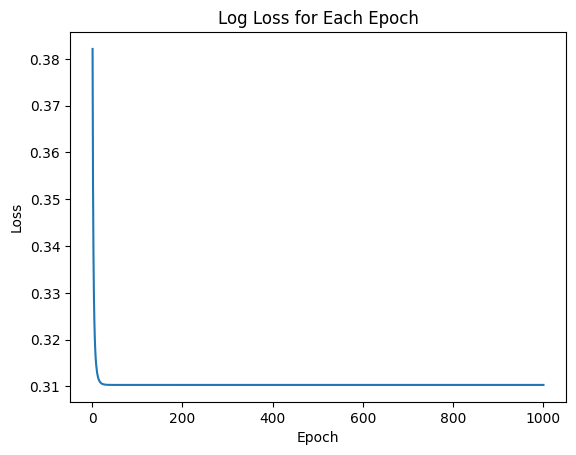

14.010005950927734


In [132]:
log_reg = SGDClassifier(loss='log', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.05, random_state=42)

# Determine the number of epochs
n_epochs = 1000

# Train the model for multiple epochs and record the loss for each epoch
s = time.time()
loss_values = []
for epoch in range(n_epochs):
    log_reg.fit(x_train, y_train)
    y_proba = log_reg.predict_proba(x_test)
    loss = log_loss(y_test, y_proba)
    loss_values.append(loss)

# Plot the loss for each epoch
plt.plot(range(1, n_epochs + 1), loss_values)
e = time.time()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Log Loss for Each Epoch')
plt.show()
time4them = e-s
print(time4them)

In [133]:
y_pred2 = log_reg.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
acc2 = accuracy_score(y_test, y_pred2)
print("Precision:", precision_score(y_test, y_pred2))
prec2 = precision_score(y_test, y_pred2)
print("Recall:", recall_score(y_test, y_pred2))
print("F1 score:", f1_score(y_test, y_pred2))

Accuracy: 0.8654901960784314
Precision: 0.8289752650176678
Recall: 0.9207221350078493
F1 score: 0.8724432874674601


14.016651630401611
14.010005950927734


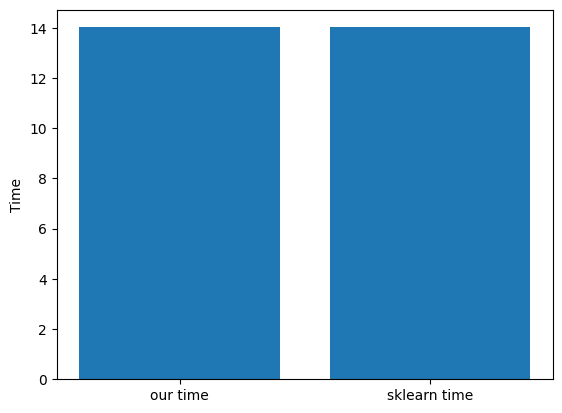

In [134]:
print(time4our)
print(time4them)


# Create a list with the two variables
values = [time4our, time4them]

# Create a list with the variable names
variables = ['our time', 'sklearn time']

# Create the barplot
plt.bar(variables, values)

# Set the y-axis label
plt.ylabel('Time')



# Show the plot
plt.show()

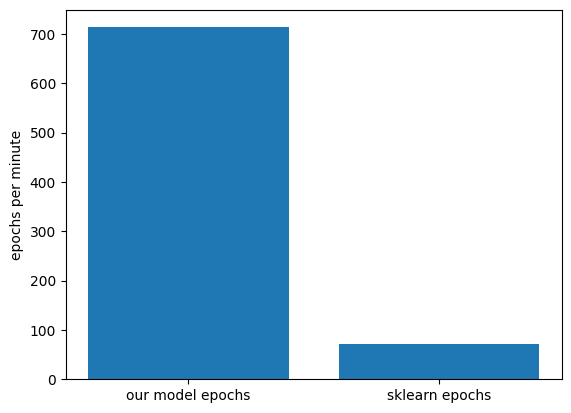

In [135]:
variables = ['our model epochs', 'sklearn epochs']
values = [n_iters/time4our, n_epochs/time4them]
# Create the barplot
plt.bar(variables,values)

# Set the y-axis label
plt.ylabel('epochs per minute')

# Show the plot
plt.show()

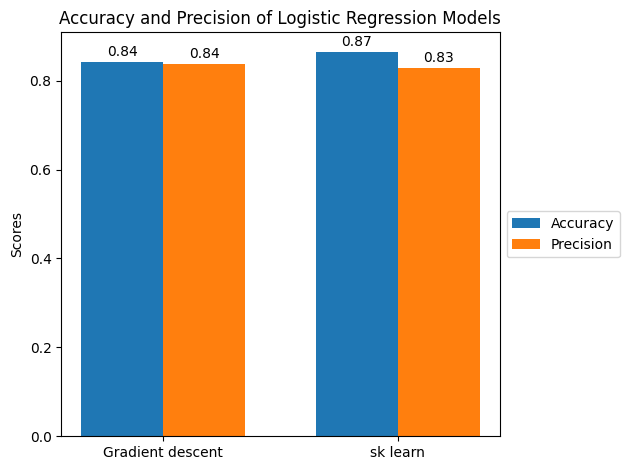

In [136]:
model_1_accuracy = acc1
model_1_precision = prec1
model_2_accuracy = acc2
model_2_precision = prec2

# Data to be plotted
labels = ['Gradient descent', 'sk learn']
accuracy_values = [model_1_accuracy, model_2_accuracy]
precision_values = [model_1_precision, model_2_precision]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision_values, width, label='Precision')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision of Logistic Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        rounded_height = round(height, 2)
        ax.annotate('{}'.format(rounded_height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()